# Analyzing Text

Write the TextAnalyzer class in the cell below. We have already imported some libraries that should be useful to you.

In [1]:
import requests, re
from bs4 import BeautifulSoup
from collections import Counter
import statistics as stats
import string

#create your class here
        

In [143]:
class TextAnalyzer:
    '''
    This class pass a src: a valid URL or a text file path or a string of text 
    to an analyzer that find, count, plot common words.
    '''
    def __init__(self,src,src_type=None):
        '''
        Initialize an object src for analysis:
        Keyword arguments:
        src (obj) -- a url path, text file or text string
        src_type -- source type. Options are: url, path to text file, text string
        '''
        self._src = src
        self._src_type = src_type
        self._content = None
        self._orig_content = None
        
        # Use discover function to find the type
        if self._src_type is None:
            print(f'Source type unknown, use discover function to find the type')
            self._src_type = self.discover()
        else:
            pass
        
        # Initialize the content with different input functions based on _src_type
        if self._src_type == 'url':
            headers = {'user-agent': 'my-app/0.0.1'}
            req = requests.get(self._src, headers=headers)
            self._orig_content = req.text
        elif self._src_type == 'path':
            with open( self._src, 'r') as f:
                self._orig_content = f.read()
        elif self._src_type == 'text':
            self._orig_content = self._src
        else:
            print(f'Please input a url, txt file path, or a text string source.')
        self._content = self._orig_content
        
        
    def discover(self):
        # Determine the type of the input src object:url/filepath/text string
        if self._src.startswith('http'):
            _src_type = 'url'
        elif self._src.endswith('txt'):
            _src_type = 'path'
        else:
            _src_type = 'text'
        return _src_type
    
    def set_content_to_tag(self, tag, tag_id=None):
        '''
        Get text using beautifulsoup library to parse HTML and get an object
        ValueError if cannot find tag/tagid
        Keyword arguments:
        tag (str) -- Tag to read
        tag_id (str) -- ID of tag to read
        '''
        self._tag = tag
        self._tag_id = tag_id
        if self._tag != tag or self._tag_id != tag_id:
            # reset to original content to use parser
            print('Calling reset_content()')
            self.reset_content()
        else:
            try:
                # Create beautifulsoup object for tag
                soup = BeautifulSoup(self._content, 'html.parser')
                # Get text and assign to self._content
                self._content = soup.find(tag, {'id': tag_id}).get_text()
                
            except ValueError:
                # raise exception of tag or tag_id is not found
                if tag is None or tag_id is None:
                    print(f"Tag {tag} or Tag_id {tag_id} is not found.")
        
    def reset_content(self):
        # Resets _content to original after set_content_to_tag(). 
        # Only for url type
        if self._src_type == 'url':
            self._content = self._orig_content 
        else:
            print(f'Source type is not a URL.')
        
        
    def _words(self,casesensitive=False):
        '''
        Returns words in _content as list.
        Keyword arguments:
        casesensitive (bool) -- If False makes all words uppercase.
        '''
        if casesensitive is True:
            words = [word.strip(string.punctuation) for word in self._content.split()]
        else:
            words = [word.strip(string.punctuation).upper() for word in self._content.split()] 
        return words
    
    def common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        '''
        Returns a list of 2-element tuples of the structure (word, num), 
        where num is the number of times word shows up in _content.
        
        Keyword arguments:
        minlen (int) - Minimum length of words to include.
        maxlen (int) - Maximum length of words to include.
        count (int) - Number of words to include.
        casesensitive (bool) -- If False makes all words uppercase
        '''
        _common_words = []
        if casesensitive is True:
            _common_words = [word for word in self._words(casesensitive) if (len(word)>=minlen and len(word)<=maxlen)]            
        else:
            _common_words = [word.upper() for word in self._words(casesensitive) if (len(word)>=minlen and len(word)<=maxlen)]
        # Use Counter from collections module
        return Counter(_common_words).most_common(count)

        
        
        
    def char_distribution(self, casesensitive=False, letters_only=False):
        '''
        Returns a list of 2-element tuples of the format (char, num), 
        where num is the number of times char shows up in _content. 
        The list should be sorted by num in descending order.

        Keyword arguments:

        casesensitive (bool) -- Consider case?
        letters_only (bool) -- Exclude non-letters?
        '''
        
        # Create a letter only item using compile
        p = re.compile('[^a-zA-Z]')
        _letter_only = p.sub('',self._content.rstrip('\n'))
        
        # Determine 4 situations
        if letters_only is True and casesensitive is True:
            _chars = [char.strip(string.punctuation) for char in _letter_only]
        elif letters_only is True and casesensitive is False:
            _chars = [char.strip(string.punctuation).upper() for char in _letter_only]
        elif letters_only is False and casesensitive is True:
            _chars = [char for char in self._content]
        elif letters_only is False and casesensitive is False:
            _chars = [char.upper() for char in self._content]
            
        # Use Counter from collections module and then sort
        char_dist = Counter(_chars).most_common()
        #char_dist = sorted(char_dist, key=lambda x: x[1], reverse=False)
        
        return char_dist
    
    def plot_common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        '''
        Plots most common words.

        Keyword arguments:

        minlen (int) -- Minimum length of words to include.
        maxlen (int) -- Maximum length of words to include.
        count (int) -- Number of words to include.
        casesensitive (bool) -- If False makes all words uppercase.
        '''
        # Convert list into df
        df_cw = pd.DataFrame(self.common_words(minlen, maxlen, count, casesensitive))
        df_cw.columns = ['Word', 'Count']
        df_cw.index = df_cw['Word']
        
        plt_words = df_cw.plot(kind='bar',
                               title='Common Words',
                               figsize=(12, 6),
                               width=.8,
                               fontsize=16)
        plt_words.set_ylabel('Word', fontsize=20)
        plt_words.set_xlabel('Count', fontsize=20)
        plt_words.grid(True)
        
    def plot_char_distribution(self, casesensitive=False, letters_only=False):
        '''
        Plots character distribution.

        Keyword arguments:

        casesensitive (bool) -- If False makes all words uppercase.
        letters_only (bool) -- Exclude non-letters?

        '''
        # convert list into DF
        df_cd = pd.DataFrame(self.char_distribution(casesensitive, letters_only))
        df_cd.columns = ['Character', 'Count']
        df_cd.index = df_cd['Character']
        
        plt_chars = df_cd.plot(kind='bar',
                               title='Character Distribution',
                               figsize=(12, 6),
                               width=.8,
                               fontsize=16)
        plt_chars.set_ylabel('Character', fontsize=20)
        plt_chars.set_xlabel('Count', fontsize=20)
        plt_chars.grid(True)
        
        
    @property
    def avg_word_length(self):
        # The average word length in _content rounded to the 100th place (e.g, 3.82).
        _avg_word_length = sum([len(_w) for _w in self._words()]) / len(self._words())
        return round(_avg_word_length, 2)
    
    @property
    def word_count(self):
        # The number of words in _content.
        return len(self._words())
    
    @property
    def distinct_word_count(self):
        # The number of distinct words in _content.
        return len(set(self._words()))
        
    @property
    def words(self):
        # A list of all words used in _content, including repeats, in all uppercase letters.
        return self._words(casesensitive=False)
    
    @property
    def positivity(self):
        '''
        A positivity score calculated as follows:
        1. Create local tally variable with initial value of 0.
        2. Increment tally by 1 for every word in self.words found in positive.txt (in same directory)
        3. Decrement tally by 1 for every word in self.words found in negative.txt (in same directory)
        4.Calculate score as follows:
        round( tally / self.word_count * 1000)
        '''
        # 1. read and parse positive word file 'positive.txt' into list
        with open('positive.txt', 'r') as _f:
            # f.read().strip(string.punctuation)
            _pdoc = _f.readlines()  # .strip(string.punctuation)
            pos_words = []
        for word in _pdoc:
            pos_words = [word.strip(string.punctuation).rstrip('\n').upper() for word in _pdoc]
            
        # 2. read and parse negative word file 'negative.txt' into list
        with open('negative.txt', 'r') as _f:
            _ndoc = _f.readlines()
            neg_words = []
        for word in _ndoc:
            neg_words = [word.strip(string.punctuation).rstrip('\n').upper() for word in _ndoc]
            
        # 3. calculate positivity score based on pos/neg word matches
        _matches = []
        _tally = 0
        _pos = 0
        _neg = 0
        _words = self.words
        for _w in _words:
            if _w in pos_words:
                _pos += 1
                
            if _w in neg_words:
                _neg += 1
        
        _tally = _tally +_pos-_neg
        _positivity = round(_tally / self.word_count * 1000)
        return _positivity
    

## Tests
When you have finished, you should run the tests below. If you get errors, you should do your very best to fix those errors before submitting the project.

If you submit your project while still getting errors, you should explain that in your project submission email. The very first thing we will do to grade your project is run it through these tests. If it fails any of the tests, and you have not indicated that you are aware of specific test failures, we will stop grading and ask you to resubmit.

In [109]:
import unittest

url = 'https://www.webucator.com/how-to/address-by-bill-clinton-1997.cfm'
path = 'pride-and-prejudice.txt'
text = '''The outlook wasn't brilliant for the Mudville Nine that day;
the score stood four to two, with but one inning more to play.
And then when Cooney died at first, and Barrows did the same,
a sickly silence fell upon the patrons of the game.'''

class TestTextAnalyzer(unittest.TestCase):
    def test_discover_url(self):
        ta = TextAnalyzer(url)
        self.assertEqual(ta._src_type, 'url')
    def test_discover_path(self):
        ta = TextAnalyzer(path)
        self.assertEqual(ta._src_type, 'path')
    def test_discover_text(self):
        ta = TextAnalyzer(text)
        self.assertEqual(ta._src_type, 'text')
    def test_set_content_to_tag(self):
        ta = TextAnalyzer(url)
        ta.set_content_to_tag('div','content-main')
        self.assertEqual(ta._content[0:25], '\n\nAddress by Bill Clinton')
    def test_reset_content(self):
        ta = TextAnalyzer(url)
        ta.set_content_to_tag('div','content-main')
        ta.reset_content()
        self.assertEqual(ta._content[0], '<')
    def test_common_words(self):
        ta = TextAnalyzer(path, src_type='path')
        common_words = ta.common_words(minlen=5, maxlen=10)
        liz = common_words[0]
        self.assertEqual(liz[0],'ELIZABETH')
    def test_avg_word_length(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.avg_word_length, 4.16)
    def test_word_count(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.word_count, 45)
    def test_distinct_word_count(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.distinct_word_count, 38)
    def test_char_distribution(self):
        ta = TextAnalyzer(text, src_type='text')
        char_dist = ta.char_distribution(letters_only=True)
        self.assertEqual(char_dist[1][1], 20)
    def test_positivity(self):
        ta = TextAnalyzer(text, src_type='text')
        positivity = ta.positivity
        self.assertEqual(positivity, -44)
        
suite = unittest.TestLoader().loadTestsFromTestCase(TestTextAnalyzer)
unittest.TextTestRunner().run(suite)

.....

Source type unknown, use discover function to find the type
Source type unknown, use discover function to find the type
Source type unknown, use discover function to find the type


...

Source type unknown, use discover function to find the type


.

Source type unknown, use discover function to find the type


..
----------------------------------------------------------------------
Ran 11 tests in 14.039s

OK


<unittest.runner.TextTestResult run=11 errors=0 failures=0>

## Plots
You should also run the cell below to make sure your plot methods work. They should produce plots that look like the images found at:
* <a href="character-distribution.png" target="image_win">character-distribution.png</a>
* <a href="common-words.png" target="image_win">common-words.png</a>

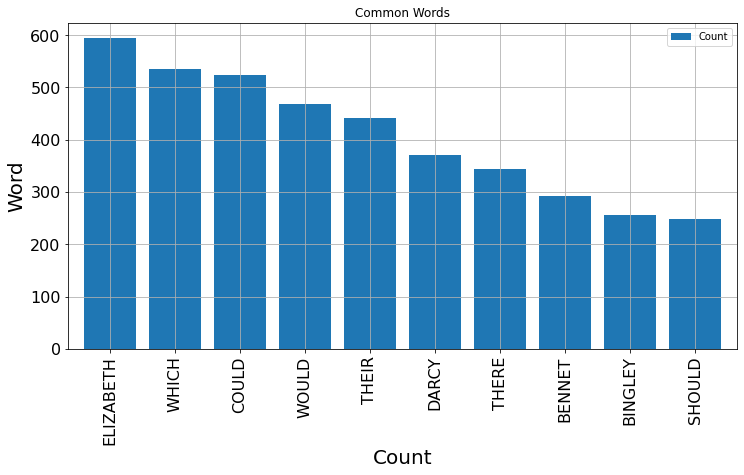

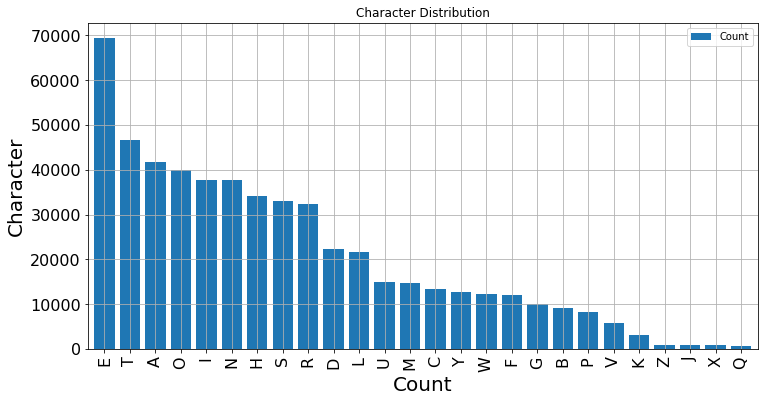

In [45]:
%matplotlib inline
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

ta = TextAnalyzer('pride-and-prejudice.txt', src_type='path')
ta.plot_common_words(minlen=5)
ta.plot_char_distribution(letters_only=True)

## Exam: Using the TextAnalyzer

### Question 1
How many words are in the text of William Henry Harrison's 1841 inaugaral address?
* The address can be found at https://www.webucator.com/how-to/william-henry-harrisons-inaugural-address.cfm.
* Its contents are in a div tag with the id 'content-main'.

In [87]:
#write code here
ta = TextAnalyzer('https://www.webucator.com/how-to/william-henry-harrisons-inaugural-address.cfm','url')
ta.set_content_to_tag('div','content-main')
ta.word_count

8430

### Question 2
What is the least common letter in pride-and-prejudice.txt?

In [124]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
ta.char_distribution(letters_only=True)[-1][0]

Source type unknown, use discover function to find the type


'Q'

### Question 3
What is the most common 11-letter word in pride-and-prejudice.txt?  

In [127]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
ta.common_words(minlen=11,maxlen=11)[0][0]

Source type unknown, use discover function to find the type


'NETHERFIELD'

### Question 4
What is the average word length in pride-and-prejudice.txt?

In [96]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
ta.avg_word_length

Source type unknown, use discover function to find the type


4.43

### Question 5
How many distinct words are there in pride-and-prejudice.txt?

In [99]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
ta.distinct_word_count

Source type unknown, use discover function to find the type


6839

### Question 6
How many words, ignoring case, are used only once in pride-and-prejudice.txt?

In [102]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
all_counter = ta.common_words(count=None)
once = 0
for word, frq in all_counter:
    if frq == 1:
        once+=1
print(str(once)+" words are used only once in PAP")

Source type unknown, use discover function to find the type
2886 words are used only once in PAP


### Question 7
How many distinct words in pride-and-prejudice.txt have less than five characters, at least one character of which is a capital 'A'.

In [148]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')

all_counter = ta.common_words(maxlen=4,count=None,casesensitive=True)

A_frq = 0
for word, frq in all_counter:
    if 'A' in word:
        A_frq+=1
print(str(A_frq)+" words are shorter than five chars with \"A\" ")

Source type unknown, use discover function to find the type
13 words are shorter than five chars with "A" 


### Question 8
A palindrome is a word spelled the same forwards and backwards, like BOB. How many distinct palindromes are there in pride-and-prejudice.txt.
* Only include words with at least three letters.

In [150]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')

all_counter = ta.common_words(minlen=3,count=None)

A_frq = 0
for word, frq in all_counter:
    if word == word[::-1]:
        A_frq+=1
print(str(A_frq)+" words are palindrome")

Source type unknown, use discover function to find the type
9 words are palindrome


### Question 9
What is the positivity rating of 'pride-and-prejudice.txt'

In [151]:
#write code here
ta = TextAnalyzer('pride-and-prejudice.txt')
ta.positivity

Source type unknown, use discover function to find the type


11

### Question 10
Which of the following addresses (originally from http://www.inaugural.senate.gov/swearing-in/addresses) has the lowest positivity rating?
1. https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm
1. https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm
1. https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm
1. https://www.webucator.com/how-to/zachary-taylors-inaugural-address.cfm

Note the contents of the addresses are in a div tag with the id 'content-main'.

In [157]:
#write code here
ta_1 = TextAnalyzer('https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm','url')
ta_1.set_content_to_tag('div','content-main')
ta_2 = TextAnalyzer('https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm','url')
ta_2.set_content_to_tag('div','content-main')
ta_3 = TextAnalyzer('https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm','url')
ta_3.set_content_to_tag('div','content-main')
ta_4 = TextAnalyzer('https://www.webucator.com/how-to/zachary-taylors-inaugural-address.cfm','url')
ta_4.set_content_to_tag('div','content-main')

pos_dict={'1':ta_1.positivity,'2':ta_2.positivity,'3':ta_3.positivity,'4':ta_4.positivity,}
print(min(pos_dict, key=pos_dict.get))

3
